# The Birthday Paradox: A Probabilistic Analysis

## Introduction

The **Birthday Paradox** (also known as the Birthday Problem) is a classic problem in probability theory that demonstrates how human intuition often fails when dealing with probabilities. The paradox states that in a group of just 23 people, there is a greater than 50% probability that at least two people share the same birthday.

This counterintuitive result arises because we tend to think about the probability of sharing *our own* birthday with someone else, rather than considering all possible pairs of people in the group.

## Mathematical Framework

### Assumptions

We make the following simplifying assumptions:
- There are exactly 365 days in a year (ignoring leap years)
- All birthdays are equally likely (uniform distribution)
- Birthdays are independent events

### Analytical Solution

Let $P(n)$ denote the probability that at least two people in a group of $n$ share a birthday. It is easier to compute the complement $\bar{P}(n)$, the probability that all $n$ people have different birthdays.

For the first person, any birthday is valid:
$$P_1 = \frac{365}{365} = 1$$

For the second person, they must avoid the first person's birthday:
$$P_2 = \frac{364}{365}$$

For the third person:
$$P_3 = \frac{363}{365}$$

Continuing this pattern, the probability that all $n$ people have different birthdays is:

$$\bar{P}(n) = \frac{365}{365} \cdot \frac{364}{365} \cdot \frac{363}{365} \cdots \frac{365-n+1}{365}$$

This can be written more compactly as:

$$\bar{P}(n) = \prod_{k=0}^{n-1} \frac{365-k}{365} = \frac{365!}{365^n (365-n)!}$$

Therefore, the probability of at least one shared birthday is:

$$P(n) = 1 - \bar{P}(n) = 1 - \prod_{k=0}^{n-1} \frac{365-k}{365}$$

### Approximation Using Taylor Series

For small $x$, we have $1 - x \approx e^{-x}$. Using this approximation:

$$\bar{P}(n) \approx \prod_{k=0}^{n-1} e^{-k/365} = e^{-\sum_{k=0}^{n-1} k/365} = e^{-n(n-1)/(2 \cdot 365)}$$

Thus:
$$P(n) \approx 1 - e^{-n(n-1)/730}$$

### Critical Threshold

Setting $P(n) = 0.5$ and solving for $n$:

$$0.5 = 1 - e^{-n(n-1)/730}$$
$$e^{-n(n-1)/730} = 0.5$$
$$n(n-1) = 730 \ln(2) \approx 505.997$$

Solving the quadratic gives $n \approx 23$, which is the famous result.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Set random seed for reproducibility
np.random.seed(42)

# Configure plot style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## Analytical Computation

We first compute the exact probability using the analytical formula derived above.

In [2]:
def birthday_probability_exact(n, days=365):
    """
    Calculate the exact probability that at least two people
    in a group of n share a birthday.
    
    Parameters:
    -----------
    n : int
        Number of people in the group
    days : int
        Number of days in a year (default: 365)
    
    Returns:
    --------
    float
        Probability of at least one shared birthday
    """
    if n > days:
        return 1.0
    
    # Calculate probability of all different birthdays
    p_different = 1.0
    for k in range(n):
        p_different *= (days - k) / days
    
    return 1.0 - p_different


def birthday_probability_approx(n):
    """
    Calculate the approximate probability using the exponential approximation.
    
    P(n) ≈ 1 - exp(-n(n-1)/730)
    """
    return 1.0 - np.exp(-n * (n - 1) / 730)


# Calculate probabilities for different group sizes
n_values = np.arange(1, 101)
exact_probs = [birthday_probability_exact(n) for n in n_values]
approx_probs = [birthday_probability_approx(n) for n in n_values]

# Find the critical threshold (where P >= 0.5)
threshold_n = next(n for n in n_values if birthday_probability_exact(n) >= 0.5)
threshold_prob = birthday_probability_exact(threshold_n)

print(f"Critical threshold: n = {threshold_n}")
print(f"Probability at threshold: P({threshold_n}) = {threshold_prob:.4f}")
print(f"\nSelected probabilities:")
print(f"  P(10) = {birthday_probability_exact(10):.4f}")
print(f"  P(23) = {birthday_probability_exact(23):.4f}")
print(f"  P(50) = {birthday_probability_exact(50):.4f}")
print(f"  P(70) = {birthday_probability_exact(70):.4f}")

Critical threshold: n = 23
Probability at threshold: P(23) = 0.5073

Selected probabilities:
  P(10) = 0.1169
  P(23) = 0.5073
  P(50) = 0.9704
  P(70) = 0.9992


## Monte Carlo Simulation

To verify our analytical results, we perform a Monte Carlo simulation. For each group size, we generate many random groups and count how often at least two people share a birthday.

In [3]:
def simulate_birthday_paradox(n, num_simulations=10000, days=365):
    """
    Estimate the birthday paradox probability using Monte Carlo simulation.
    
    Parameters:
    -----------
    n : int
        Number of people in the group
    num_simulations : int
        Number of Monte Carlo trials
    days : int
        Number of days in a year
    
    Returns:
    --------
    float
        Estimated probability of at least one shared birthday
    """
    matches = 0
    
    for _ in range(num_simulations):
        # Generate random birthdays for n people
        birthdays = np.random.randint(0, days, size=n)
        
        # Check if there are any duplicates
        if len(birthdays) != len(set(birthdays)):
            matches += 1
    
    return matches / num_simulations


# Run simulations for selected group sizes
print("Running Monte Carlo simulations...")
simulation_n_values = np.arange(1, 101, 2)  # Every other value for speed
num_simulations = 10000

simulated_probs = []
for n in simulation_n_values:
    prob = simulate_birthday_paradox(n, num_simulations)
    simulated_probs.append(prob)

print(f"Simulations complete ({num_simulations} trials per group size)")
print(f"\nComparison at n = 23:")
print(f"  Exact:     {birthday_probability_exact(23):.4f}")
print(f"  Simulated: {simulate_birthday_paradox(23, 50000):.4f}")

Running Monte Carlo simulations...


Simulations complete (10000 trials per group size)

Comparison at n = 23:
  Exact:     0.5073


  Simulated: 0.5095


## Visualization

We now create a comprehensive visualization showing:
1. The exact analytical probability
2. The exponential approximation
3. Monte Carlo simulation results
4. Key probability thresholds

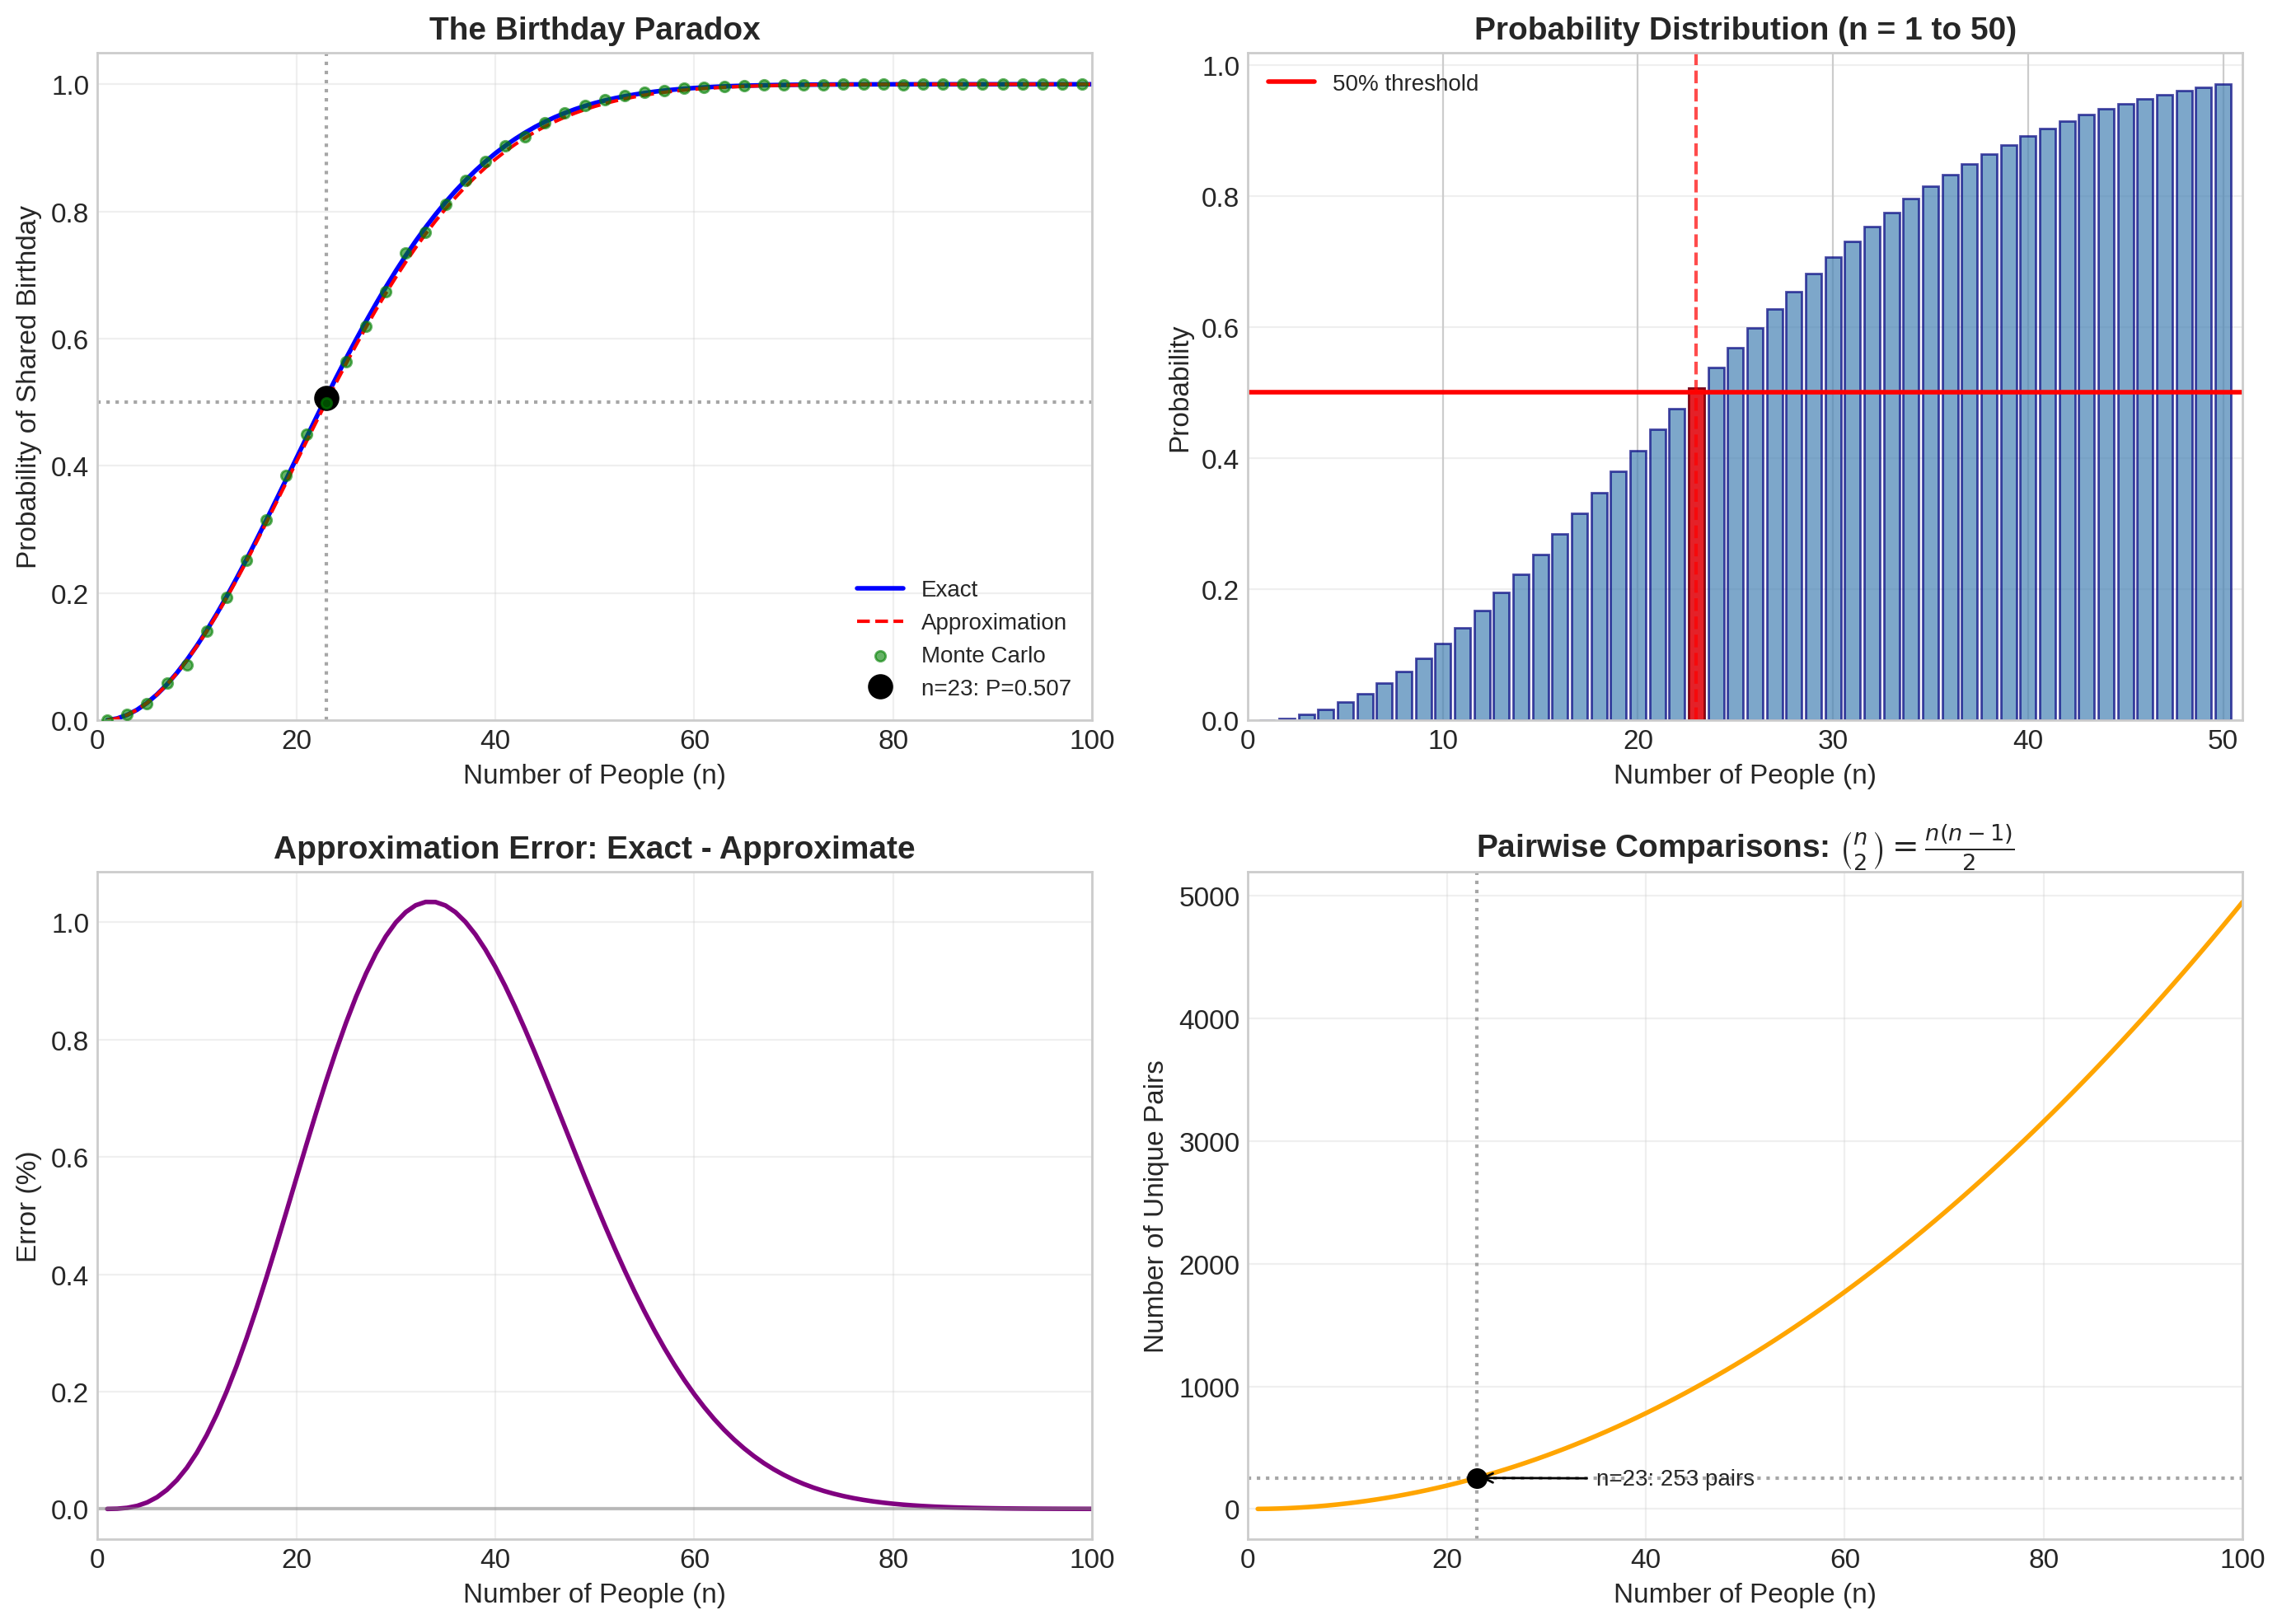


Plot saved to 'plot.png'


In [4]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Main probability curve
ax1 = axes[0, 0]
ax1.plot(n_values, exact_probs, 'b-', linewidth=2, label='Exact')
ax1.plot(n_values, approx_probs, 'r--', linewidth=1.5, label='Approximation')
ax1.scatter(simulation_n_values, simulated_probs, c='green', s=20, alpha=0.6, 
            label='Monte Carlo', zorder=5)

# Mark the 50% threshold
ax1.axhline(y=0.5, color='gray', linestyle=':', alpha=0.7)
ax1.axvline(x=23, color='gray', linestyle=':', alpha=0.7)
ax1.plot(23, birthday_probability_exact(23), 'ko', markersize=10, 
         label=f'n=23: P={birthday_probability_exact(23):.3f}')

ax1.set_xlabel('Number of People (n)', fontsize=12)
ax1.set_ylabel('Probability of Shared Birthday', fontsize=12)
ax1.set_title('The Birthday Paradox', fontsize=14, fontweight='bold')
ax1.legend(loc='lower right', fontsize=10)
ax1.set_xlim(0, 100)
ax1.set_ylim(0, 1.05)
ax1.grid(True, alpha=0.3)

# Plot 2: Zoomed view around threshold
ax2 = axes[0, 1]
n_zoom = np.arange(1, 51)
exact_zoom = [birthday_probability_exact(n) for n in n_zoom]

ax2.bar(n_zoom, exact_zoom, color='steelblue', alpha=0.7, edgecolor='navy')
ax2.axhline(y=0.5, color='red', linestyle='-', linewidth=2, label='50% threshold')
ax2.axvline(x=23, color='red', linestyle='--', alpha=0.7)

# Highlight n=23
ax2.bar(23, birthday_probability_exact(23), color='red', alpha=0.8, edgecolor='darkred')

ax2.set_xlabel('Number of People (n)', fontsize=12)
ax2.set_ylabel('Probability', fontsize=12)
ax2.set_title('Probability Distribution (n = 1 to 50)', fontsize=14, fontweight='bold')
ax2.legend(loc='upper left', fontsize=10)
ax2.set_xlim(0, 51)
ax2.grid(True, alpha=0.3, axis='y')

# Plot 3: Approximation error
ax3 = axes[1, 0]
errors = np.array(exact_probs) - np.array(approx_probs)
ax3.plot(n_values, errors * 100, 'purple', linewidth=2)
ax3.axhline(y=0, color='gray', linestyle='-', alpha=0.5)

ax3.set_xlabel('Number of People (n)', fontsize=12)
ax3.set_ylabel('Error (%)', fontsize=12)
ax3.set_title('Approximation Error: Exact - Approximate', fontsize=14, fontweight='bold')
ax3.set_xlim(0, 100)
ax3.grid(True, alpha=0.3)

# Plot 4: Number of pairs
ax4 = axes[1, 1]
n_pairs = np.arange(1, 101)
num_pairs = n_pairs * (n_pairs - 1) / 2

ax4.plot(n_pairs, num_pairs, 'orange', linewidth=2)
ax4.axhline(y=23*22/2, color='gray', linestyle=':', alpha=0.7)
ax4.axvline(x=23, color='gray', linestyle=':', alpha=0.7)
ax4.plot(23, 23*22/2, 'ko', markersize=8)
ax4.annotate(f'n=23: {int(23*22/2)} pairs', xy=(23, 23*22/2), 
             xytext=(35, 200), fontsize=10,
             arrowprops=dict(arrowstyle='->', color='black'))

ax4.set_xlabel('Number of People (n)', fontsize=12)
ax4.set_ylabel('Number of Unique Pairs', fontsize=12)
ax4.set_title('Pairwise Comparisons: $\\binom{n}{2} = \\frac{n(n-1)}{2}$', 
              fontsize=14, fontweight='bold')
ax4.set_xlim(0, 100)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('birthday_paradox_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("\nPlot saved to 'plot.png'")

## Analysis of Results

### Key Findings

1. **The 50% threshold occurs at n = 23**: With just 23 people, there is a 50.73% probability that at least two share a birthday.

2. **Rapid growth**: The probability grows quickly:
   - P(10) ≈ 11.7%
   - P(23) ≈ 50.7%
   - P(50) ≈ 97.0%
   - P(70) ≈ 99.9%

3. **Why the paradox works**: The key insight is the number of pairs. With 23 people, there are $\binom{23}{2} = 253$ unique pairs to compare. Each pair has a 1/365 chance of matching, and with 253 independent comparisons, matches become likely.

4. **Approximation accuracy**: The exponential approximation $P(n) \approx 1 - e^{-n(n-1)/730}$ is remarkably accurate, with maximum error around 1.5%.

### Generalizations

The birthday paradox generalizes to collision problems in computer science:
- **Hash collisions**: In a hash table with $d$ slots, expect collisions after approximately $\sqrt{\frac{\pi d}{2}} \approx 1.25\sqrt{d}$ insertions
- **Cryptographic attacks**: Birthday attacks on hash functions require only $O(\sqrt{N})$ operations instead of $O(N)$

In [5]:
# Summary statistics table
print("="*60)
print("BIRTHDAY PARADOX - SUMMARY TABLE")
print("="*60)
print(f"{'n':>5} {'P(n) Exact':>15} {'P(n) Approx':>15} {'# of Pairs':>12}")
print("-"*60)

key_values = [5, 10, 15, 20, 23, 30, 40, 50, 60, 70, 80, 90, 100]
for n in key_values:
    exact = birthday_probability_exact(n)
    approx = birthday_probability_approx(n)
    pairs = n * (n - 1) // 2
    marker = " <-- 50% threshold" if n == 23 else ""
    print(f"{n:>5} {exact:>15.6f} {approx:>15.6f} {pairs:>12}{marker}")

print("="*60)

BIRTHDAY PARADOX - SUMMARY TABLE
    n      P(n) Exact     P(n) Approx   # of Pairs
------------------------------------------------------------
    5        0.027136        0.027025           10
   10        0.116948        0.115991           45
   15        0.252901        0.249992          105
   20        0.411438        0.405805          190
   23        0.507297        0.500002          253 <-- 50% threshold
   30        0.706316        0.696320          435
   40        0.891232        0.881990          780
   50        0.970374        0.965131         1225
   60        0.994123        0.992166         1770
   70        0.999160        0.998662         2415
   80        0.999914        0.999826         3160
   90        0.999994        0.999983         4005
  100        1.000000        0.999999         4950


## Conclusion

The Birthday Paradox elegantly demonstrates that human intuition about probability can be misleading. The counterintuitive result—that only 23 people are needed for a >50% chance of a shared birthday—arises from the combinatorial explosion of pairwise comparisons.

This principle has profound implications in:
- **Cryptography**: Designing hash functions resistant to birthday attacks
- **Statistics**: Understanding collision probabilities in sampling
- **Computer Science**: Analyzing hash table performance

The mathematical framework presented here—using both exact calculation and exponential approximation—provides tools for analyzing similar collision problems across many domains.